# Auto Auction Prediction

Yueju Su
suyueju@gmail.com
16/05/2020


Data

It's a data collection of a dealer vehicle auction information during the sencond half of 2018, which includes whether the vehicle is sold or not as well as the floor price and market price, and some other car related information.

Challenges 

1. To build a machine learning model that predicts the probability of sell of each offering. 
2. To help the dealer to understand how the probablity of sell of each offering is impacted by how they set the floor price with repect to the market price.
3. Are there any other factors that also impact the probablity of sell?

# Step1. Import the dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\suyue\\Documents\\AutoAuction.csv")
data.shape

(40403, 20)

In [2]:
data.head()

,sauci,sdtesa,arrivaldate,dmpostcond,smiles,color,dmsold,MID_YEAR,ch_make,ch_model,ch_body,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal
0,RAA,20161115,20161103,3.8,44169,Gray,1,2013,Honda,Civic Sdn,Sedan,9500.0,46,8,143,R,N,N,10632.0,0
1,MAAI,20160727,20160709,4.2,52753,White,1,2013,Chrysler,200,Sedan,7800.0,30,22,11,R,N,N,8658.0,0
2,DALA,20160831,20160812,3.4,21914,White,1,2015,Chrysler,200,Sedan,11500.0,35,2,59,R,N,N,11457.0,0
3,FAAO,20161129,20161102,2.0,53307,White,1,2015,Chrysler,200,Sedan,8000.0,48,19,305,R,N,N,7681.0,0
4,DALA,20161026,20160927,4.2,23859,Gray,1,2015,Dodge,Dart,Sedan,9650.0,43,4,53,R,N,N,9880.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40403 entries, 0 to 40402
Data columns (total 20 columns):
sauci           40403 non-null object
sdtesa          40403 non-null int64
arrivaldate     40403 non-null int64
dmpostcond      40403 non-null float64
smiles          40403 non-null int64
color           40352 non-null object
dmsold          40403 non-null int64
MID_YEAR        40403 non-null int64
ch_make         40403 non-null object
ch_model        40403 non-null object
ch_body         40402 non-null object
sfloor          40384 non-null float64
SALE_NUM        40403 non-null int64
LANE_NUM        40403 non-null int64
RUN_NUM         40403 non-null int64
sflndr          40401 non-null object
RED_LIGHT       40403 non-null object
YELLOW_LIGHT    40403 non-null object
AdjMMR          39513 non-null float64
abnormal        40403 non-null int64
dtypes: float64(3), int64(9), object(8)
memory usage: 6.2+ MB


Data Dictionary:

1. sauci: Auction Code

2. sdtesa: Vehicle Offer Date at the Auction																																
3. arrivaldate: Vehicle Arrival Date at the Auction																														
4. dmpostcond: Condition Grade																																
5. smiles: Vehicle Mileage																																
6. color: Color																																
7. dmsold: Indicator of Sold or Not																																	
8. ch_make: Chrome Defined Vehicle Make																																
9. ch_model: Chrome Defined Vehicle Model																																
10. ch_body: Chrome Defined Vehicle Body																																
11. sfloor: Floor Price																										
12. MID_YEAR: Vehicle Made Year																																
13. SALE_NUM: Sale Number During the Year																																
14. LANE_NUM: Lane Number at the Auction																																
15. RUN_NUM: Run Number at the Auction																																
16. sflndr: Car Souce Indicator, L: Lease R: Repo  D: Rental N: Dealer F: Factory 																														
17. RED_LIGHT: Red Light, Announcement Lights used by Auction. Vehicles selling under the red light will only qualify for arbitration under the rules outlined in the Sale Day.	

18. YELLOW_LIGHT: Yellow Light, Announcement Lights used by Auction. This light is an indication to the Buyer that the Auctioneer or Selling Representative has made announcements that qualify the condition and limit arbitration of this vehicle.																											
19. AdjMMR: the estimated current market price																													
20. abnormal: Abnormal Indicator, defined based on whether there are some serious problem mentioned in the annoucnment or remarks such as flood damage																										


In [4]:
data.describe()

,sdtesa,arrivaldate,dmpostcond,smiles,dmsold,MID_YEAR,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,AdjMMR,abnormal
count,4.040300e+04,4.040300e+04,40403.000000,40403.000000,40403.000000,40403.000000,40384.000000,40403.000000,40403.000000,40403.000000,39513.000000,40403.000000
mean,2.016097e+07,2.016086e+07,3.786538,32274.356533,0.683588,2004.442838,12502.871682,42.175037,16.210306,127.815930,12305.930428,0.041408
std,1.662672e+02,2.181099e+02,0.682171,16976.602713,0.465082,135.650049,3922.255696,11.486279,10.654894,98.830541,3723.250915,0.199234
min,2.016070e+07,2.015082e+07,0.000000,36.000000,0.000000,-1.000000,1000.000000,26.000000,1.000000,1.000000,1377.000000,0.000000
25%,2.016082e+07,2.016072e+07,3.500000,22742.000000,0.000000,2013.000000,10000.000000,34.000000,9.000000,54.000000,9919.000000,0.000000
50%,2.016093e+07,2.016090e+07,3.900000,31852.000000,1.000000,2013.000000,11500.000000,41.000000,15.000000,110.000000,11381.000000,0.000000
75%,2.016111e+07,2.016101e+07,4.300000,39922.500000,1.000000,2014.000000,14300.000000,48.000000,19.000000,182.000000,14032.000000,0.000000
max,2.016123e+07,2.016122e+07,5.000000,999999.000000,1.000000,2017.000000,146300.000000,454.000000,77.000000,1155.000000,58624.000000,1.000000


In [5]:
for column in data.columns:
    #uniques = sorted(data[column].unique())
    uniques = data[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

sauci                   14	 ['RAA' 'MAAI' 'DALA' 'FAAO' 'NVAA']
sdtesa                 106	 [20161115 20160727 20160831 20161129 20161026]
arrivaldate            310	 [20161103 20160709 20160812 20161102 20160927]
dmpostcond              41	 [3.8 4.2 3.4 2.  3.7]
smiles               22689	 [44169 52753 21914 53307 23859]
color                   18	 ['Gray' 'White' 'Red' 'Orange' 'Black']
dmsold                   2	 [1 0]
MID_YEAR                12	 [2013 2015 2014 2012 2011]
ch_make                 21	 ['Honda' 'Chrysler' 'Dodge' 'Jeep' 'Ram']
ch_model                78	 ['Civic Sdn' '200' 'Dart' 'Wrangler' 'Wrangler Unlimited']
ch_body                  9	 ['Sedan' 'SUV' 'Unknown' 'Truck' 'Hatchback']
sfloor                 530	 [ 9500.  7800. 11500.  8000.  9650.]
SALE_NUM                53	 [46 30 35 48 43]
LANE_NUM                28	 [ 8 22  2 19  4]
RUN_NUM                548	 [143  11  59 305  53]
sflndr                   3	 ['R' 'L' nan]
RED_LIGHT                2	 ['N' 'Y']
YEL

A few quick observations about the original dataset:
1. There are some missing value
2. The max 'smiles' 999999 miles and 'MID_YEAR' -1 do not make sense! Let's do some investigation on them: 

In [6]:
uniques1=sorted(data['smiles'].unique(),reverse=True)
print(uniques1[:10])
data[data['smiles']>350000]

[999999, 314809, 280364, 278078, 225608, 178786, 173155, 163506, 160274, 159202]


,sauci,sdtesa,arrivaldate,dmpostcond,smiles,color,dmsold,MID_YEAR,ch_make,ch_model,ch_body,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal
29003,FAAO,20160920,20160805,0.0,999999,Red,1,2013,Hyundai,Azera,Sedan,6200.0,38,19,401,L,N,N,12108.0,1
29900,FAAO,20160920,20160812,0.0,999999,White,1,2014,Hyundai,Genesis,Sedan,25500.0,38,19,402,L,N,N,19322.0,1


In [7]:
uniques2=sorted(data['MID_YEAR'].unique())
print(uniques2[:10])
print(data[data['MID_YEAR']<2000].shape)
data[data['MID_YEAR']<2000]

[-1, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
(184, 20)


,sauci,sdtesa,arrivaldate,dmpostcond,smiles,color,dmsold,MID_YEAR,ch_make,ch_model,ch_body,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal
4666,WPBA,20161013,20160830,4.5,40581,White,1,-1,Hyundai,Sonata,Sedan,12800.0,41,1,173,R,N,N,NaN,0
4667,WPBA,20160929,20160830,4.5,40581,White,0,-1,Hyundai,Sonata,Sedan,13500.0,39,1,156,R,N,N,NaN,0
18151,WPBA,20161123,20160928,3.9,25550,White,0,-1,Kia,Optima,Sedan,19600.0,47,1,94,L,N,N,NaN,0
18152,WPBA,20161215,20160928,3.9,25550,White,0,-1,Kia,Optima,Sedan,18500.0,50,1,161,L,N,N,NaN,0
18153,WPBA,20161027,20160928,3.9,25550,White,0,-1,Kia,Optima,Sedan,19200.0,43,1,82,L,N,N,NaN,0
18154,WPBA,20161110,20160928,3.9,25550,White,0,-1,Kia,Optima,Sedan,18500.0,45,1,59,L,N,N,NaN,0
18158,WPBA,20161222,20161012,4.9,35186,Black,0,-1,Kia,Optima,Sedan,19500.0,51,1,120,L,N,N,NaN,0
18159,WPBA,20161208,20161012,4.9,35186,Black,0,-1,Kia,Optima,Sedan,20000.0,49,1,110,L,N,N,NaN,0
18401,RAA,20161227,20161109,4.2,25648,White,0,-1,Kia,Optima,Sedan,20000.0,52,8,31,L,N,N,NaN,0
18484,WPBA,20161208,20161020,3.5,29869,White,0,-1,Kia,Optima,Sedan,17000.0,49,1,92,L,N,N,NaN,0


In [8]:
data[data['MID_YEAR']<2000].describe()

,sdtesa,arrivaldate,dmpostcond,smiles,dmsold,MID_YEAR,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,AdjMMR,abnormal
count,1.840000e+02,1.840000e+02,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,2.000000,184.000000
mean,2.016101e+07,2.016082e+07,3.962500,32821.744565,0.538043,-1.0,14293.614130,47.836957,15.347826,97.548913,11436.500000,0.027174
std,1.683350e+02,7.352905e+02,0.635865,19677.783610,0.499911,0.0,4987.107352,13.544726,11.298179,69.088269,9893.130976,0.163034
min,2.016070e+07,2.015112e+07,1.300000,692.000000,0.000000,-1.0,1500.000000,26.000000,1.000000,1.000000,4441.000000,0.000000
25%,2.016083e+07,2.016073e+07,3.775000,20595.000000,0.000000,-1.0,10900.000000,37.000000,8.000000,35.000000,7938.750000,0.000000
50%,2.016103e+07,2.016091e+07,4.100000,33684.000000,1.000000,-1.0,13700.000000,47.000000,8.000000,97.000000,11436.500000,0.000000
75%,2.016113e+07,2.016101e+07,4.400000,43234.000000,1.000000,-1.0,17000.000000,52.000000,32.000000,136.500000,14934.250000,0.000000
max,2.016123e+07,2.016121e+07,5.000000,106167.000000,1.000000,-1.0,35800.000000,77.000000,43.000000,362.000000,18432.000000,1.000000


Since there are only two records with 'smiles' 999999, we can drop them. However, there 184 records with 'MID_YEAR' values -1, we can't just drop them. After check the other features of these 184 records, we found most of them have 'smiles' value less than 5000 miles, so we can guess the made year of these 184 vehicles is current year, which is 2018. 

Let's drop the two records with 'smiles' value 999999, and replace the 'MID_YEAR' with values '-1' to '2018'. 

In [9]:
data=data[data['smiles']<350000]
data.MID_YEAR.replace([-1],[2018],inplace=True)
data.describe()


,sdtesa,arrivaldate,dmpostcond,smiles,dmsold,MID_YEAR,sfloor,SALE_NUM,LANE_NUM,RUN_NUM,AdjMMR,abnormal
count,4.040100e+04,4.040100e+04,40401.000000,40401.000000,40401.000000,40401.000000,40382.000000,40401.000000,40401.000000,40401.000000,39511.000000,40401.000000
mean,2.016097e+07,2.016086e+07,3.786726,32226.450558,0.683572,2013.637608,12502.705909,42.175243,16.210168,127.802381,12305.757865,0.041360
std,1.662710e+02,2.181150e+02,0.681668,15551.722488,0.465088,1.010137,3921.694097,11.486526,10.655139,98.814225,3723.177700,0.199125
min,2.016070e+07,2.015082e+07,0.000000,36.000000,0.000000,2007.000000,1000.000000,26.000000,1.000000,1.000000,1377.000000,0.000000
25%,2.016082e+07,2.016072e+07,3.500000,22742.000000,0.000000,2013.000000,10000.000000,34.000000,9.000000,54.000000,9919.000000,0.000000
50%,2.016093e+07,2.016090e+07,3.900000,31852.000000,1.000000,2013.000000,11500.000000,41.000000,15.000000,110.000000,11381.000000,0.000000
75%,2.016111e+07,2.016101e+07,4.300000,39921.000000,1.000000,2014.000000,14300.000000,48.000000,19.000000,182.000000,14032.000000,0.000000
max,2.016123e+07,2.016122e+07,5.000000,314809.000000,1.000000,2018.000000,146300.000000,454.000000,77.000000,1155.000000,58624.000000,1.000000


# Step2. Feature selection based on business knowledge

## 2.1 Drop the unrelevant variables from the original dataset

In [10]:
print(data.columns)
data1=data.drop(['sauci', 
           'arrivaldate', 
           'SALE_NUM',           
           'LANE_NUM', 
           'RUN_NUM'],axis='columns')
data1.columns

Index(['sauci', 'sdtesa', 'arrivaldate', 'dmpostcond', 'smiles', 'color', 'dmsold', 'MID_YEAR', 'ch_make', 'ch_model', 'ch_body', 'sfloor', 'SALE_NUM', 'LANE_NUM', 'RUN_NUM', 'sflndr', 'RED_LIGHT', 'YELLOW_LIGHT', 'AdjMMR', 'abnormal'], dtype='object')


Index(['sdtesa', 'dmpostcond', 'smiles', 'color', 'dmsold', 'MID_YEAR', 'ch_make', 'ch_model', 'ch_body', 'sfloor', 'sflndr', 'RED_LIGHT', 'YELLOW_LIGHT', 'AdjMMR', 'abnormal'], dtype='object')

## 2.2 Combine the original variables containing samiliar information

In [11]:
# usually the dealer set the floor price with respect to the estimated market price,
  # here I will calculate the ratio of the two prices, which can check whether the floor price 
   # align with the market price
data1['floor_market_ratio']=data1['sfloor']/data1['AdjMMR']


In [12]:
data1.describe()

,sdtesa,dmpostcond,smiles,dmsold,MID_YEAR,sfloor,AdjMMR,abnormal,floor_market_ratio
count,4.040100e+04,40401.000000,40401.000000,40401.000000,40401.000000,40382.000000,39511.000000,40401.000000,39493.000000
mean,2.016097e+07,3.786726,32226.450558,0.683572,2013.637608,12502.705909,12305.757865,0.041360,1.014772
std,1.662710e+02,0.681668,15551.722488,0.465088,1.010137,3921.694097,3723.177700,0.199125,0.093324
min,2.016070e+07,0.000000,36.000000,0.000000,2007.000000,1000.000000,1377.000000,0.000000,0.101599
25%,2.016082e+07,3.500000,22742.000000,0.000000,2013.000000,10000.000000,9919.000000,0.000000,0.975610
50%,2.016093e+07,3.900000,31852.000000,1.000000,2013.000000,11500.000000,11381.000000,0.000000,1.010288
75%,2.016111e+07,4.300000,39921.000000,1.000000,2014.000000,14300.000000,14032.000000,0.000000,1.048671
max,2.016123e+07,5.000000,314809.000000,1.000000,2018.000000,146300.000000,58624.000000,1.000000,9.966619


We found the max ratio of floor price and market price is over 9.6, which is strange. Let's check it:

In [13]:
data1[data1['floor_market_ratio']>2]

,sdtesa,dmpostcond,smiles,color,dmsold,MID_YEAR,ch_make,ch_model,ch_body,sfloor,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal,floor_market_ratio
1329,20161123,3.7,25731,Black,1,2013,Hyundai,Elantra,Sedan,25900.0,L,N,N,9449.0,0,2.741031
14538,20161109,3.2,15551,Red,1,2014,Kia,Optima,Sedan,111200.0,L,N,N,11624.0,0,9.566414
22616,20160923,3.7,48088,Brown,0,2014,Hyundai,Santa Fe,SUV,146300.0,L,N,N,14679.0,0,9.966619


There are only three records with 'floor_market_ratio' value over 2, we will drop the records.

In [14]:
data1=data1[data1['floor_market_ratio']<2]
data1.describe()

,sdtesa,dmpostcond,smiles,dmsold,MID_YEAR,sfloor,AdjMMR,abnormal,floor_market_ratio
count,3.949000e+04,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000
mean,2.016096e+07,3.784082,32299.646518,0.685465,2013.608255,12469.762472,12304.805723,0.041631,1.014285
std,1.653700e+02,0.681272,15482.577288,0.464336,0.963142,3815.421199,3722.548442,0.199747,0.068943
min,2.016070e+07,0.000000,36.000000,0.000000,2007.000000,1000.000000,1377.000000,0.000000,0.101599
25%,2.016082e+07,3.500000,22834.750000,0.000000,2013.000000,10000.000000,9919.000000,0.000000,0.975610
50%,2.016093e+07,3.900000,31906.000000,1.000000,2013.000000,11500.000000,11381.000000,0.000000,1.010282
75%,2.016111e+07,4.300000,39965.750000,1.000000,2014.000000,14300.000000,14031.000000,0.000000,1.048640
max,2.016123e+07,5.000000,314809.000000,1.000000,2018.000000,51450.000000,58624.000000,1.000000,1.953602


In [15]:
# Indicate the floor price not respect to market price when there is over 5% difference
data1['floor_market_unmatch']=data1['floor_market_ratio'].apply(lambda x: 1 if abs(x-1)>0.05 else 0)

## 2.3 Transfer the origial variables to the measureable new features

In [16]:
#from datetime import datetime
#data1['soldmonth']=pd.to_datetime(data1['sdtesa']).dt.month

# Extract sold month from sold date
data1['sdtesa']= data1['sdtesa'].astype(str)
data1['soldmonth']=(data1['sdtesa'].str[4:6]).astype(int)

#Transfer veichle made year to the age of years
data1['AgeOfYears']=2018-data1.MID_YEAR 
data1.head()

,sdtesa,dmpostcond,smiles,color,dmsold,MID_YEAR,ch_make,ch_model,ch_body,sfloor,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal,floor_market_ratio,floor_market_unmatch,soldmonth,AgeOfYears
0,20161115,3.8,44169,Gray,1,2013,Honda,Civic Sdn,Sedan,9500.0,R,N,N,10632.0,0,0.893529,1,11,5
1,20160727,4.2,52753,White,1,2013,Chrysler,200,Sedan,7800.0,R,N,N,8658.0,0,0.900901,1,7,5
2,20160831,3.4,21914,White,1,2015,Chrysler,200,Sedan,11500.0,R,N,N,11457.0,0,1.003753,0,8,3
3,20161129,2.0,53307,White,1,2015,Chrysler,200,Sedan,8000.0,R,N,N,7681.0,0,1.041531,0,11,3
4,20161026,4.2,23859,Gray,1,2015,Dodge,Dart,Sedan,9650.0,R,N,N,9880.0,0,0.976721,0,10,3


In [17]:
data1=data1.drop(['sdtesa','MID_YEAR'],axis='columns')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39490 entries, 0 to 40402
Data columns (total 17 columns):
dmpostcond              39490 non-null float64
smiles                  39490 non-null int64
color                   39441 non-null object
dmsold                  39490 non-null int64
ch_make                 39490 non-null object
ch_model                39490 non-null object
ch_body                 39489 non-null object
sfloor                  39490 non-null float64
sflndr                  39488 non-null object
RED_LIGHT               39490 non-null object
YELLOW_LIGHT            39490 non-null object
AdjMMR                  39490 non-null float64
abnormal                39490 non-null int64
floor_market_ratio      39490 non-null float64
floor_market_unmatch    39490 non-null int64
soldmonth               39490 non-null int32
AgeOfYears              39490 non-null int64
dtypes: float64(4), int32(1), int64(5), object(7)
memory usage: 5.3+ MB


# Step3 Treat the missing value

In [18]:
# Fill in missing 'sfloor','AdjMMR' and 'floor_market_ratio' with mean
data1['sfloor'].fillna(data1['sfloor'].mean(), inplace=True)
data1['AdjMMR'].fillna(data1['AdjMMR'].mean(), inplace=True)
data1['floor_market_ratio'].fillna(data1['floor_market_ratio'].mean(), inplace=True)

# Fill in missing and 'Unknown' vaule of 'color','ch_body','sflndr' with their highest count value
print(data1.color.value_counts())
print(data1.ch_body.value_counts())
print(data1.sflndr.value_counts())

Black        9700
White        8127
Silver       6837
Gray         5039
Blue         3942
Red          3121
Brown         915
Green         490
Purple        317
Beige         294
Burgundy      230
Gold          206
Orange        121
Unknown        52
Yellow         43
Off-white       5
Turquoise       2
Name: color, dtype: int64
Sedan          27932
SUV             6031
Wagon           2695
Coupe           1635
Hatchback       1182
Truck              8
Unknown            5
Convertible        1
Name: ch_body, dtype: int64
L    33308
R     6180
Name: sflndr, dtype: int64


In [19]:
data1['color']=data1['color'].fillna('Black')
data1.color.replace(['Unknown'],['Black'],inplace=True)
data1['ch_body']=data1['ch_body'].fillna('Sedan')
data1.ch_body.replace(['Unknown'],['Sedan'],inplace=True)
data1['sflndr']=data1['sflndr'].fillna('L')

In [20]:
print(data1.color.value_counts())
print(data1.ch_body.value_counts())
print(data1.sflndr.value_counts())

Black        9801
White        8127
Silver       6837
Gray         5039
Blue         3942
Red          3121
Brown         915
Green         490
Purple        317
Beige         294
Burgundy      230
Gold          206
Orange        121
Yellow         43
Off-white       5
Turquoise       2
Name: color, dtype: int64
Sedan          27938
SUV             6031
Wagon           2695
Coupe           1635
Hatchback       1182
Truck              8
Convertible        1
Name: ch_body, dtype: int64
L    33310
R     6180
Name: sflndr, dtype: int64


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39490 entries, 0 to 40402
Data columns (total 17 columns):
dmpostcond              39490 non-null float64
smiles                  39490 non-null int64
color                   39490 non-null object
dmsold                  39490 non-null int64
ch_make                 39490 non-null object
ch_model                39490 non-null object
ch_body                 39490 non-null object
sfloor                  39490 non-null float64
sflndr                  39490 non-null object
RED_LIGHT               39490 non-null object
YELLOW_LIGHT            39490 non-null object
AdjMMR                  39490 non-null float64
abnormal                39490 non-null int64
floor_market_ratio      39490 non-null float64
floor_market_unmatch    39490 non-null int64
soldmonth               39490 non-null int32
AgeOfYears              39490 non-null int64
dtypes: float64(4), int32(1), int64(5), object(7)
memory usage: 5.3+ MB


# Step4. Understand the dataset
  By checking the relationship between individual predictor with the label 'dmsold'

## 4.1 Explore the categorical features

Group Counts and Sold Rate Table
        color  counts  counts_percentage  mean_dmsold
0       Beige     294           0.007445     0.707483
1       Black    9801           0.248189     0.650750
2        Blue    3942           0.099823     0.693557
3       Brown     915           0.023170     0.690710
4    Burgundy     230           0.005824     0.773913
5        Gold     206           0.005217     0.708738
6        Gray    5039           0.127602     0.707085
7       Green     490           0.012408     0.712245
8   Off-white       5           0.000127     0.600000
9      Orange     121           0.003064     0.561983
10     Purple     317           0.008027     0.643533
11        Red    3121           0.079033     0.705223
12     Silver    6837           0.173132     0.698845
13  Turquoise       2           0.000051     0.500000
14      White    8127           0.205799     0.688815
15     Yellow      43           0.001089     0.651163


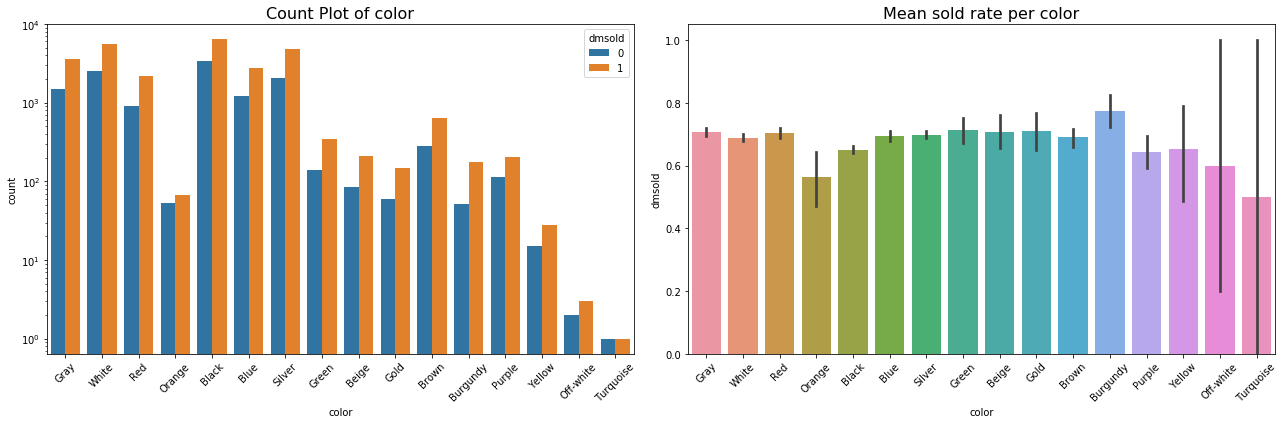

In [22]:
# Visualization of different color
dist = data1.groupby('color').size().reset_index().rename(columns={0:'counts'})
dist['counts_percentage'] = dist.counts/39490
dist['mean_dmsold']=data1.groupby(['color'])['dmsold'].mean().reset_index().dmsold
print('Group Counts and Sold Rate Table')
print(dist)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
p1=sns.countplot(x='color', hue='dmsold', data=data1, ax=ax[0])
for item in p1.get_xticklabels():
    item.set_rotation(45)
ax[0].set_title('Count Plot of color', fontsize=16)
ax[0].set_yscale('log')

p2=sns.barplot(x='color', y='dmsold', data=data1, ax=ax[1]);
for item in p2.get_xticklabels():
    item.set_rotation(45)
ax[1].set_title('Mean sold rate per color', fontsize=16)
plt.tight_layout()
plt.show()

The  group means of 'dmsold' show that color may inflence the sell.

In [23]:
# Visualization of different Categorical Features
def Visualiztion_CategoricalFeatures(feature):
    dist = data1.groupby(feature).size().reset_index().rename(columns={0:'counts'})
    dist['counts_percentage'] = dist.counts/39490
    dist['mean_dmsold']=data1.groupby([feature])['dmsold'].mean().reset_index().dmsold
    print('Summary')
    print(dist)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    p1=sns.countplot(x=feature, hue='dmsold', data=data1, ax=ax[0])
    for item in p1.get_xticklabels():
        item.set_rotation(45)
    ax[0].set_title('Count Plot', fontsize=16)
    ax[0].set_yscale('log')

    p2=sns.barplot(x=feature, y='dmsold', data=data1, ax=ax[1]);
    for item in p2.get_xticklabels():
        item.set_rotation(45)
    ax[1].set_title('Mean Sold Rate', fontsize=16)
    plt.tight_layout()
    plt.show()

Summary
          ch_make  counts  counts_percentage  mean_dmsold
0            Audi       1           0.000025     1.000000
1             BMW       1           0.000025     0.000000
2           Buick       1           0.000025     1.000000
3        Cadillac       1           0.000025     1.000000
4       Chevrolet       8           0.000203     1.000000
5        Chrysler       7           0.000177     1.000000
6           Dodge      12           0.000304     1.000000
7            Ford       9           0.000228     0.666667
8             GMC       2           0.000051     1.000000
9           Honda       3           0.000076     1.000000
10        Hyundai   23749           0.601393     0.685882
11           Jeep       7           0.000177     0.571429
12            Kia   15649           0.396278     0.684261
13          Lexus       2           0.000051     0.500000
14           MINI       1           0.000025     1.000000
15          Mazda       2           0.000051     0.500000
16  Me

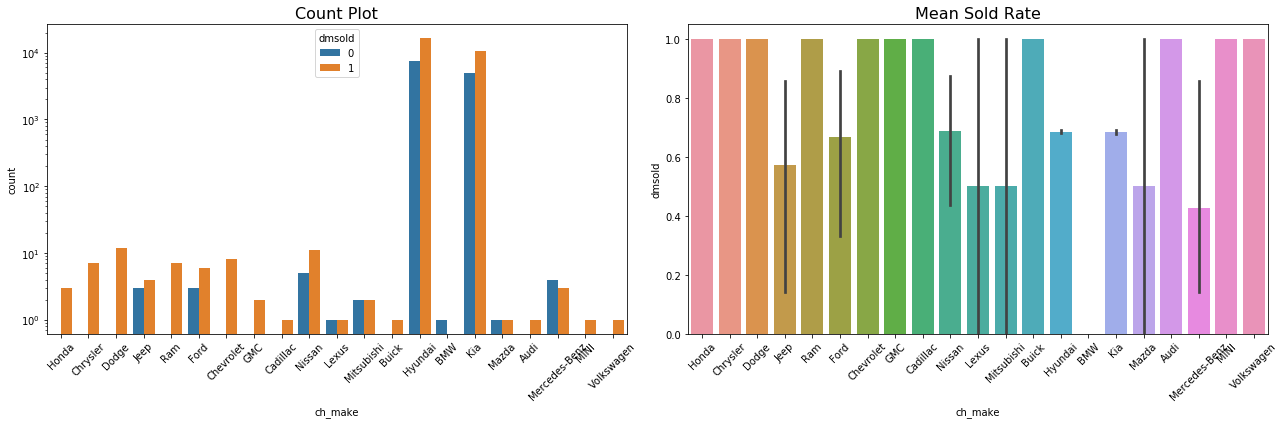

In [24]:
Visualiztion_CategoricalFeatures('ch_make')

Summary
              ch_model  counts  counts_percentage  mean_dmsold
0                 1500       6           0.000152     1.000000
1                  200       3           0.000076     1.000000
2                  300       2           0.000051     1.000000
3                 3500       1           0.000025     1.000000
4                 370Z       1           0.000025     1.000000
5               Acadia       1           0.000025     1.000000
6               Accent     656           0.016612     0.713415
7               Altima       8           0.000203     0.625000
8                Azera     354           0.008964     0.596045
9              C-Class       4           0.000101     0.500000
10           CLS-Class       3           0.000076     0.333333
11                CX-9       2           0.000051     0.500000
12             Cadenza     896           0.022689     0.641741
13              Camaro       1           0.000025     1.000000
14          Challenger       2           0.0000

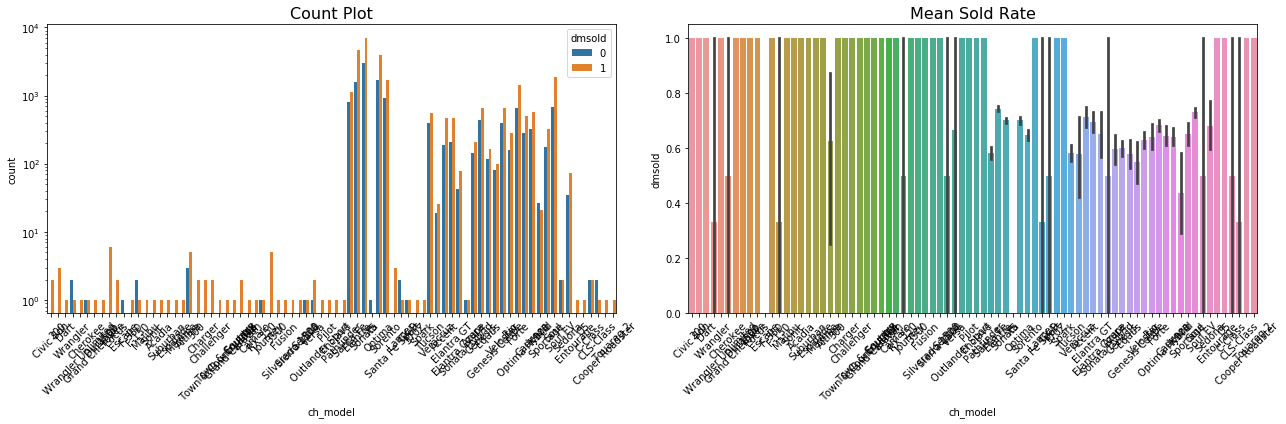

In [25]:
Visualiztion_CategoricalFeatures('ch_model')

Summary
       ch_body  counts  counts_percentage  mean_dmsold
0  Convertible       1           0.000025     1.000000
1        Coupe    1635           0.041403     0.615902
2    Hatchback    1182           0.029932     0.697970
3          SUV    6031           0.152722     0.616979
4        Sedan   27938           0.707470     0.699907
5        Truck       8           0.000203     0.750000
6        Wagon    2695           0.068245     0.725417


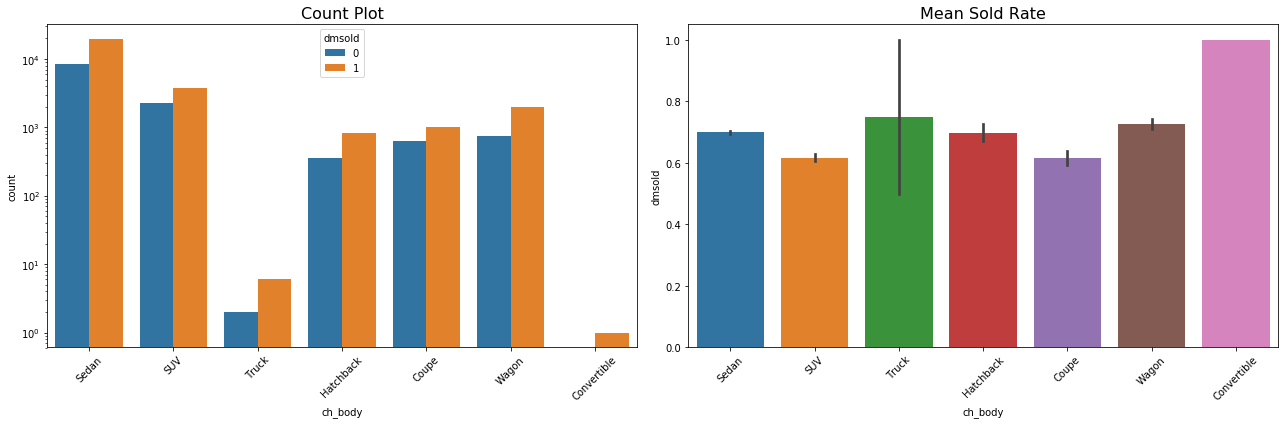

In [26]:
Visualiztion_CategoricalFeatures('ch_body')

Summary
  sflndr  counts  counts_percentage  mean_dmsold
0      L   33310           0.843505     0.686971
1      R    6180           0.156495     0.677346


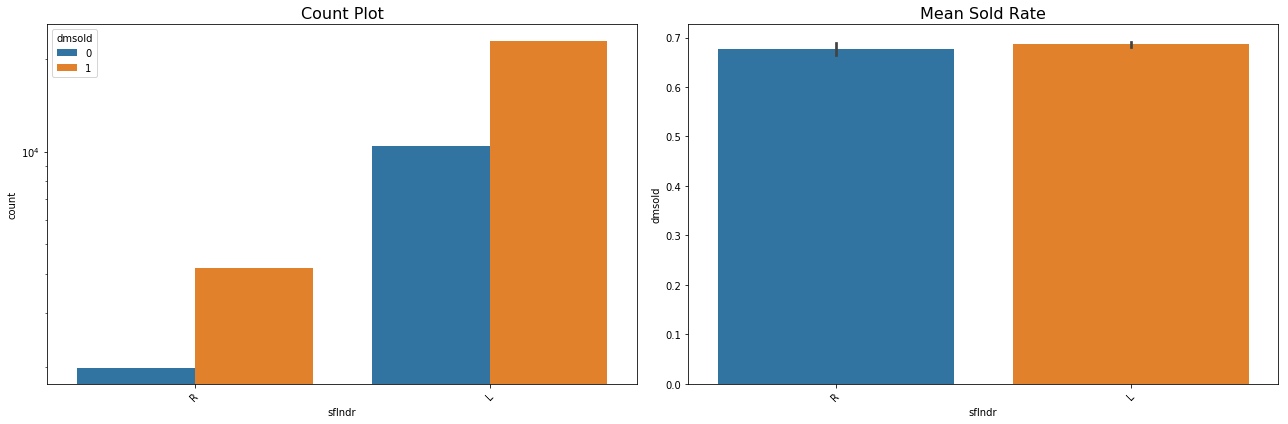

In [27]:
Visualiztion_CategoricalFeatures('sflndr')

Summary
  RED_LIGHT  counts  counts_percentage  mean_dmsold
0         N   39244           0.993771     0.685532
1         Y     246           0.006229     0.674797


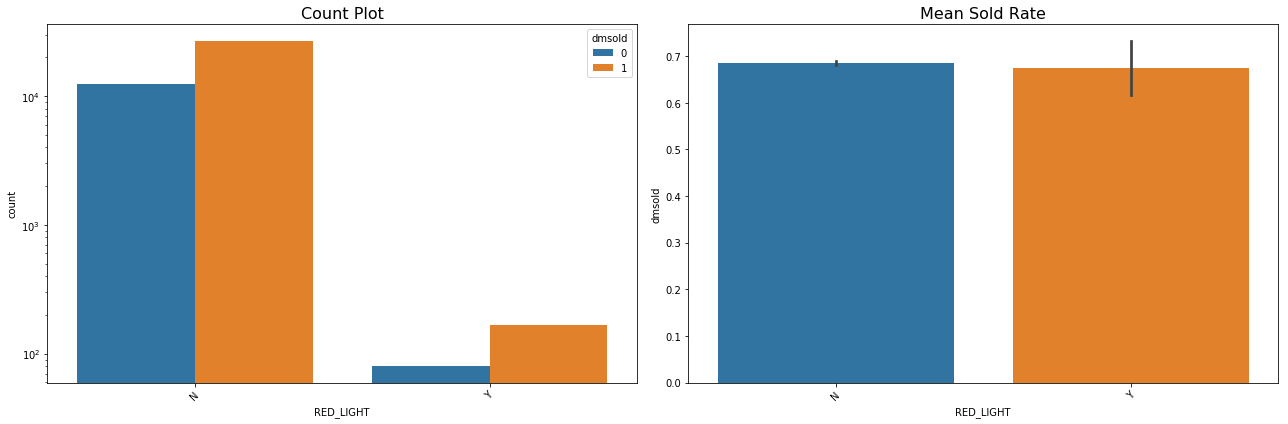

In [28]:
Visualiztion_CategoricalFeatures('RED_LIGHT')

Summary
  YELLOW_LIGHT  counts  counts_percentage  mean_dmsold
0            N   37648           0.953355     0.688137
1            Y    1842           0.046645     0.630836


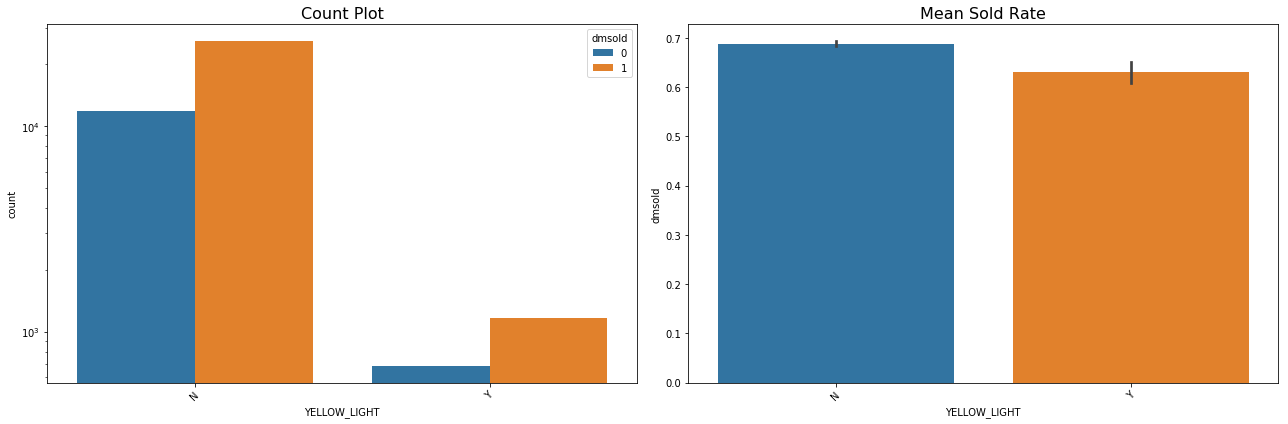

In [29]:
Visualiztion_CategoricalFeatures('YELLOW_LIGHT')

Summary
   abnormal  counts  counts_percentage  mean_dmsold
0         0   37846           0.958369     0.687867
1         1    1644           0.041631     0.630170


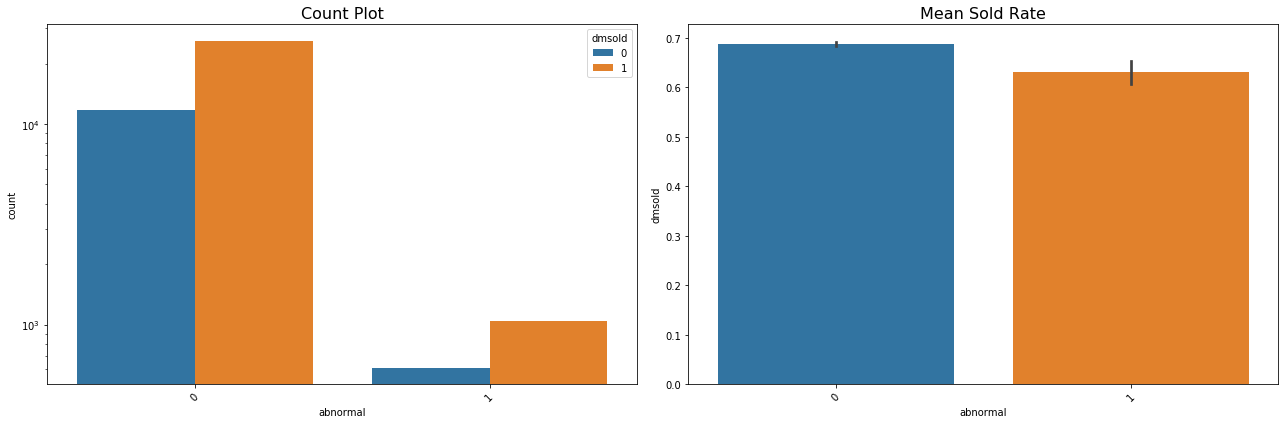

In [30]:
Visualiztion_CategoricalFeatures('abnormal')

Summary
   floor_market_unmatch  counts  counts_percentage  mean_dmsold
0                     0   24921           0.631071     0.730829
1                     1   14569           0.368929     0.607866


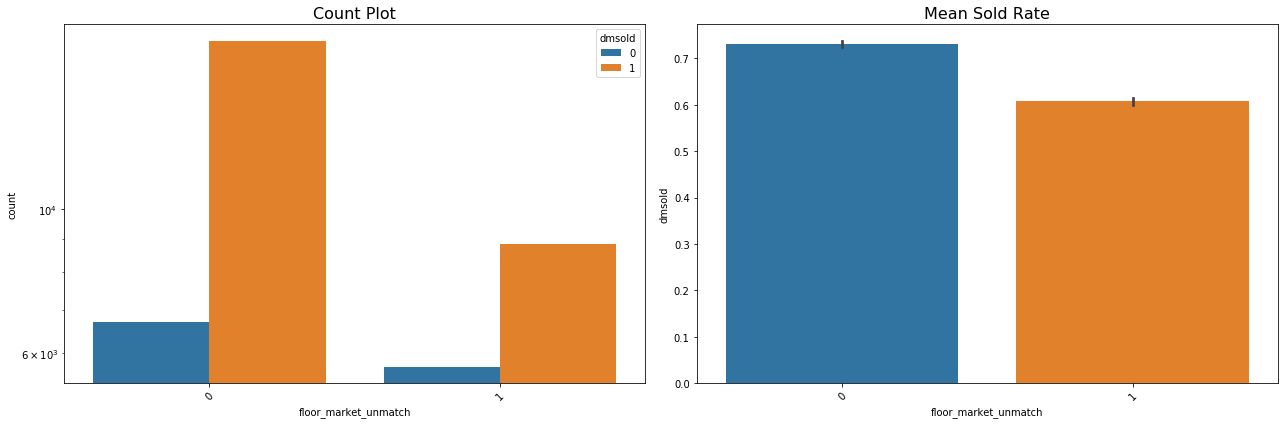

In [31]:
Visualiztion_CategoricalFeatures('floor_market_unmatch')

Comments for the categorical features:

1.The top two groups of 'ch_make' show the similar group mean of sold, which indicates that 'ch_make' may have very little influence of the sell.
2. There is NO big group difference under features: 'sflndr' and 'RED_LIGHT'.
3. The indicator of whether the floor respect with market price will inflence the sell, the vehicle with the floor price not respect to market price will not easy to be sold.
4. The features: 'color','ch_model','ch_body','anormal' and 'YELLOW_LIGHT' may infulence the vehicle sell.




## 4.2 Explore the numerical features

In [32]:
data1.columns

Index(['dmpostcond', 'smiles', 'color', 'dmsold', 'ch_make', 'ch_model', 'ch_body', 'sfloor', 'sflndr', 'RED_LIGHT', 'YELLOW_LIGHT', 'AdjMMR', 'abnormal', 'floor_market_ratio', 'floor_market_unmatch', 'soldmonth', 'AgeOfYears'], dtype='object')

In [33]:
# Visualization of Numerical Features

def Visualization_NumericalFeatures(data1,feature):
    grouped = data1[[feature, 'dmsold']].groupby(feature).mean().reset_index()
    hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.distplot(data1[data1['dmsold'] == 0][feature], label='dmsold 0',
                 ax=ax[0], hist_kws=hist_kws)
    sns.distplot(data1[data1['dmsold'] == 1][feature], label='dmsold 1', 
                 ax=ax[0], hist_kws=hist_kws)
    ax[0].set_title('Count Plot', fontsize=16)
    ax[0].legend()
    
    ax[1].plot(grouped[feature], grouped['dmsold'], '.-')
    ax[1].set_title('Mean Sold Rate', fontsize=16)
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Mean Sold rate')
    ax[1].grid(True)
    plt.show()

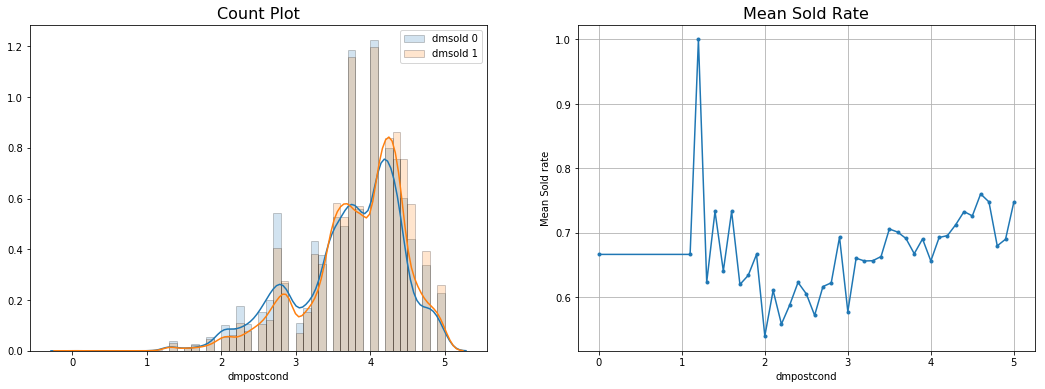

In [34]:
Visualization_NumericalFeatures(data1,'dmpostcond')

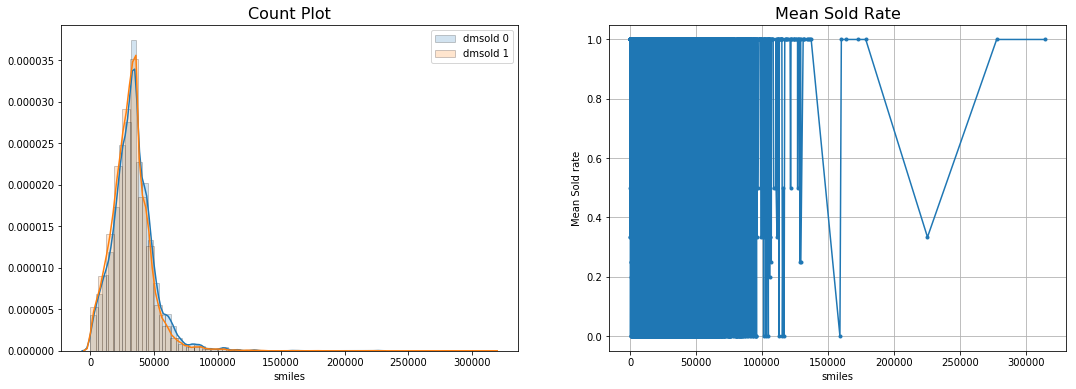

In [35]:
Visualization_NumericalFeatures(data1,'smiles')

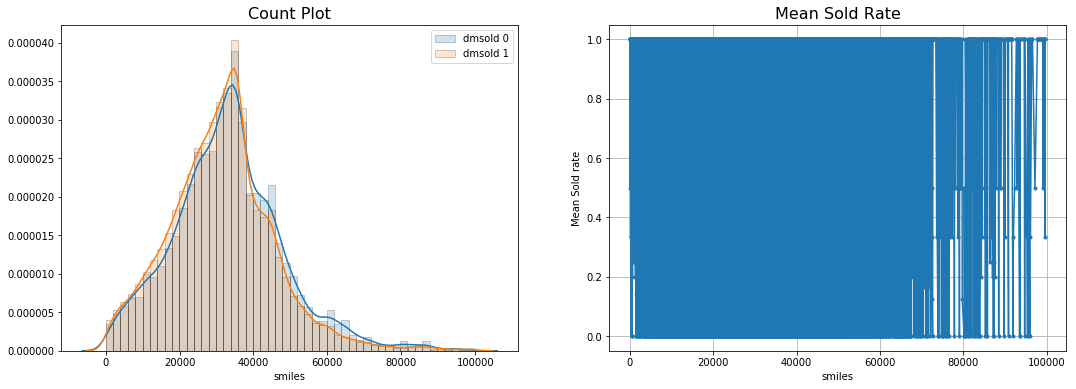

In [36]:
#Visualization of 'smiles' under 100000
tem=data1[data1['smiles']<100000]
Visualization_NumericalFeatures(tem,'smiles')

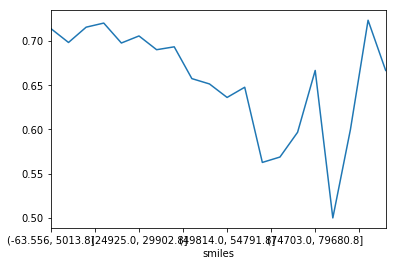

In [37]:
#Visualization of 'smiles' under 100000
#sold rate of under 20 bins
tem['dmsold'].groupby(pd.cut(tem.smiles,20)).mean().plot()

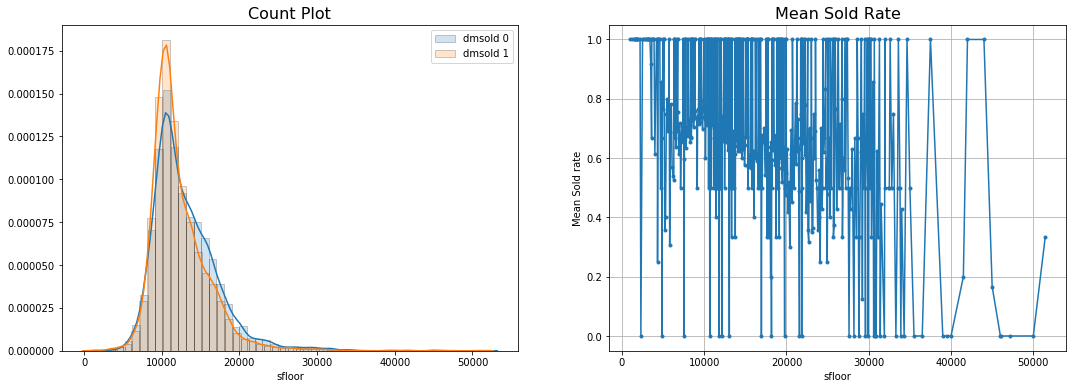

In [38]:
Visualization_NumericalFeatures(data1,'sfloor')

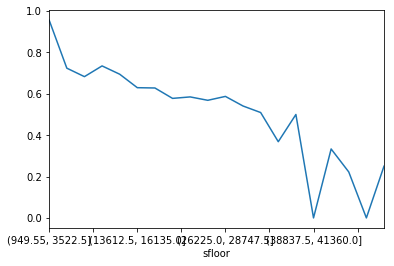

In [39]:
data1['dmsold'].groupby(pd.cut(data1.sfloor,20)).mean().plot()

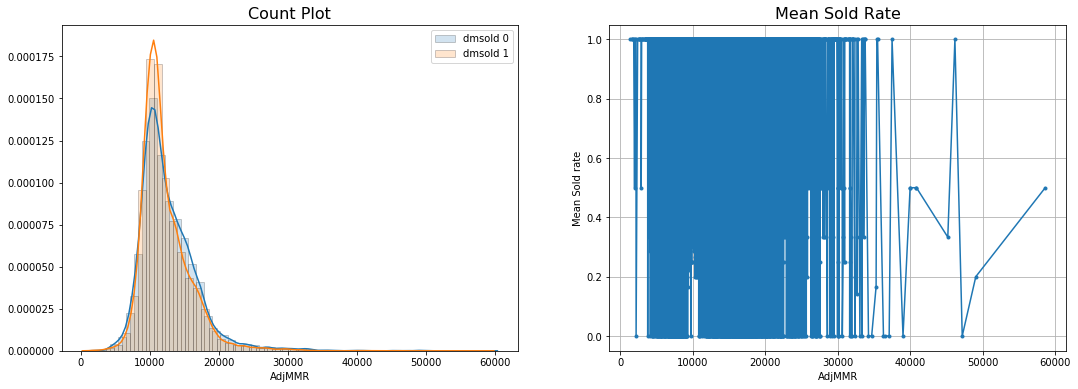

In [40]:
Visualization_NumericalFeatures(data1,'AdjMMR')

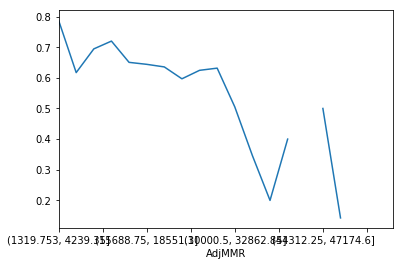

In [41]:
data1['dmsold'].groupby(pd.cut(data1.AdjMMR,20)).mean().plot()

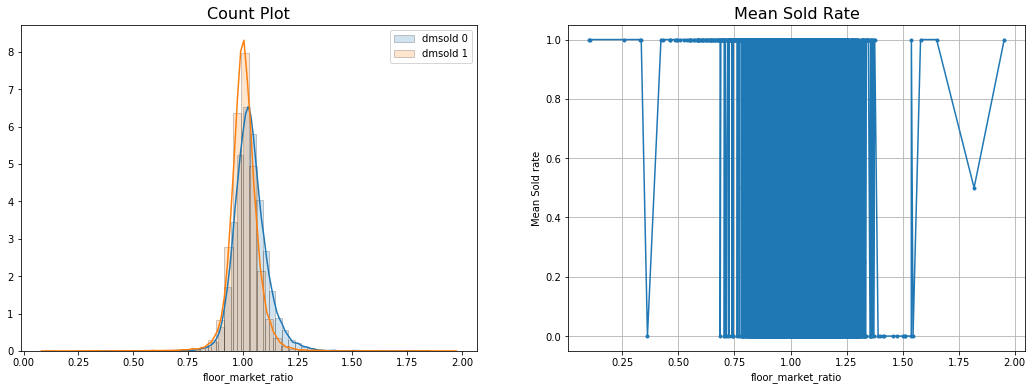

In [42]:
Visualization_NumericalFeatures(data1,'floor_market_ratio')

In [43]:
data1.describe()

,dmpostcond,smiles,dmsold,sfloor,AdjMMR,abnormal,floor_market_ratio,floor_market_unmatch,soldmonth,AgeOfYears
count,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000,39490.000000
mean,3.784082,32299.646518,0.685465,12469.762472,12304.805723,0.041631,1.014285,0.368929,9.470727,4.391745
std,0.681272,15482.577288,0.464336,3815.421199,3722.548442,0.199747,0.068943,0.482521,1.659075,0.963142
min,0.000000,36.000000,0.000000,1000.000000,1377.000000,0.000000,0.101599,0.000000,7.000000,0.000000
25%,3.500000,22834.750000,0.000000,10000.000000,9919.000000,0.000000,0.975610,0.000000,8.000000,4.000000
50%,3.900000,31906.000000,1.000000,11500.000000,11381.000000,0.000000,1.010282,0.000000,9.000000,5.000000
75%,4.300000,39965.750000,1.000000,14300.000000,14031.000000,0.000000,1.048640,1.000000,11.000000,5.000000
max,5.000000,314809.000000,1.000000,51450.000000,58624.000000,1.000000,1.953602,1.000000,12.000000,11.000000


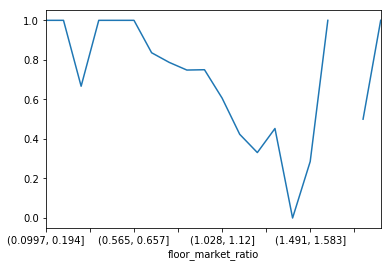

In [44]:
data1['dmsold'].groupby(pd.cut(data1.floor_market_ratio,20)).mean().plot()

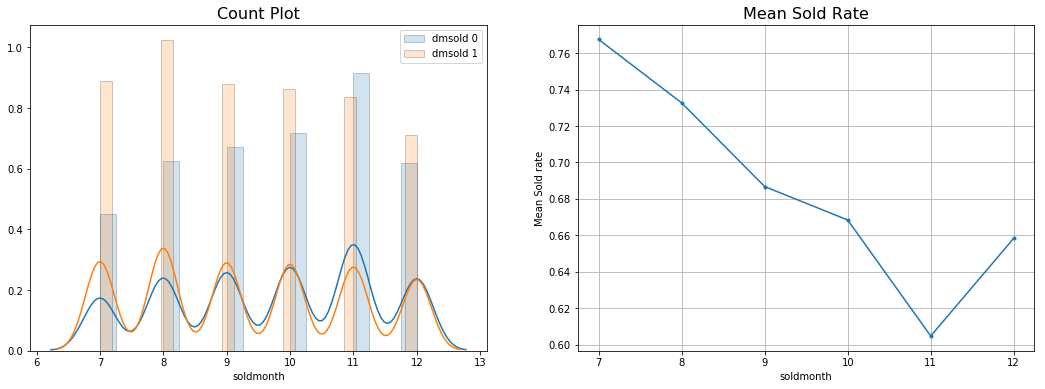

In [45]:
Visualization_NumericalFeatures(data1,'soldmonth')

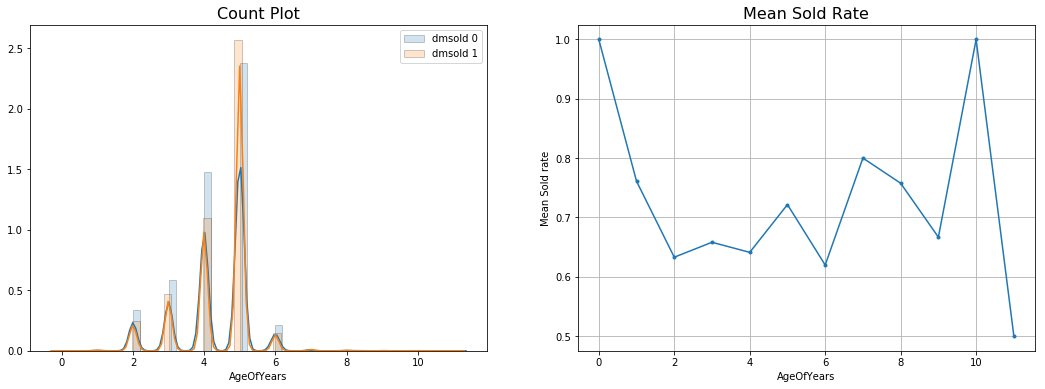

In [46]:
Visualization_NumericalFeatures(data1,'AgeOfYears')

Comments for the numerical features:

1. The vehicles with better condition are easier to be sold
2. Vehicle with miles less than 70000 are popular
3. Vehicle with lower floor or market price  are easier to be sold
4. Higher 'floor_market_ratio' will reduce the sell chance, which is in accordance with the influence of 'floor_market_match' on auction. 
5. The sales jumps to its peak during July and reach its bottom during November
6. Vehicles with age less than 2 years are more popular 

# Step5. Encode the Categorical Features

In [47]:
# One hot encoding the top groups  of 'color','ch_make', 'ch_model' and 'ch_body' with percentage of frequency over 5%
    
def one_hot_top_n(n,variable,data):
    top_n=[x for x in data[variable].value_counts().sort_values(ascending=False).head(n).index]
    for label in top_n:
        data[variable+'_'+label]=np.where(data[variable]==label,1,0)

In [48]:
       
one_hot_top_n(6,'color',data1)
one_hot_top_n(2,'ch_make',data1)
one_hot_top_n(7,'ch_model',data1)
one_hot_top_n(3,'ch_body',data1)


In [49]:
# Map 'Y'==1 and 'N'==0 for 'RED_LIGHT' and 'YELLOW_LIGHT'
data1['RED_LIGHT_ind']=data1.RED_LIGHT.map({'Y':1,'N':0})
data1['YELLOW_LIGHT_ind']=data1.YELLOW_LIGHT.map({'Y':1,'N':0})

In [50]:
one_hot_top_n(1,'sflndr',data1)
data1.head()

,dmpostcond,smiles,color,dmsold,ch_make,ch_model,ch_body,sfloor,sflndr,RED_LIGHT,YELLOW_LIGHT,AdjMMR,abnormal,floor_market_ratio,floor_market_unmatch,soldmonth,AgeOfYears,color_Black,color_White,color_Silver,color_Gray,color_Blue,color_Red,ch_make_Hyundai,ch_make_Kia,ch_model_Sonata,ch_model_Elantra,ch_model_Optima,ch_model_Sorento,ch_model_Soul,ch_model_Forte,ch_model_Santa Fe,ch_body_Sedan,ch_body_SUV,ch_body_Wagon,RED_LIGHT_ind,YELLOW_LIGHT_ind,sflndr_L
0,3.8,44169,Gray,1,Honda,Civic Sdn,Sedan,9500.0,R,N,N,10632.0,0,0.893529,1,11,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,4.2,52753,White,1,Chrysler,200,Sedan,7800.0,R,N,N,8658.0,0,0.900901,1,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3.4,21914,White,1,Chrysler,200,Sedan,11500.0,R,N,N,11457.0,0,1.003753,0,8,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2.0,53307,White,1,Chrysler,200,Sedan,8000.0,R,N,N,7681.0,0,1.041531,0,11,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.2,23859,Gray,1,Dodge,Dart,Sedan,9650.0,R,N,N,9880.0,0,0.976721,0,10,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
data1=data1.drop(['color','ch_make','ch_model','ch_body', 'sflndr','RED_LIGHT','YELLOW_LIGHT'],axis='columns')

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39490 entries, 0 to 40402
Data columns (total 31 columns):
dmpostcond              39490 non-null float64
smiles                  39490 non-null int64
dmsold                  39490 non-null int64
sfloor                  39490 non-null float64
AdjMMR                  39490 non-null float64
abnormal                39490 non-null int64
floor_market_ratio      39490 non-null float64
floor_market_unmatch    39490 non-null int64
soldmonth               39490 non-null int32
AgeOfYears              39490 non-null int64
color_Black             39490 non-null int32
color_White             39490 non-null int32
color_Silver            39490 non-null int32
color_Gray              39490 non-null int32
color_Blue              39490 non-null int32
color_Red               39490 non-null int32
ch_make_Hyundai         39490 non-null int32
ch_make_Kia             39490 non-null int32
ch_model_Sonata         39490 non-null int32
ch_model_Elantra        3949

# Step6 Reduce the features

In [52]:
# Let's first check the feature correlation
X=data1.drop(['dmsold'],axis='columns')
X.corr()

,dmpostcond,smiles,sfloor,AdjMMR,abnormal,floor_market_ratio,floor_market_unmatch,soldmonth,AgeOfYears,color_Black,color_White,color_Silver,color_Gray,color_Blue,color_Red,ch_make_Hyundai,ch_make_Kia,ch_model_Sonata,ch_model_Elantra,ch_model_Optima,ch_model_Sorento,ch_model_Soul,ch_model_Forte,ch_model_Santa Fe,ch_body_Sedan,ch_body_SUV,ch_body_Wagon,RED_LIGHT_ind,YELLOW_LIGHT_ind,sflndr_L
dmpostcond,1.000000,-0.265830,0.343068,0.336614,-0.427157,0.029907,-0.162081,0.022373,-0.191186,-0.065982,0.066093,-0.001579,0.018116,-0.017751,-0.015489,-0.051295,0.054313,0.007324,-0.084107,0.000083,0.094592,0.022932,-0.056847,0.048783,-0.068142,0.109294,0.021639,-0.122397,-0.420832,0.058236
smiles,-0.265830,1.000000,-0.269064,-0.301353,0.035035,0.145565,0.160829,-0.026044,0.466875,0.045702,0.004096,0.014274,-0.012723,-0.016461,-0.041747,0.064924,-0.070148,0.056898,-0.049021,-0.014800,0.020193,-0.061891,-0.058362,0.055312,0.002238,0.053171,-0.059422,0.292442,0.055161,0.034623
sfloor,0.343068,-0.269064,1.000000,0.974833,-0.113332,0.163951,-0.016307,0.009350,-0.295646,0.006933,0.065320,-0.027120,0.015916,-0.050699,-0.051814,-0.076156,0.071363,-0.119743,-0.270769,0.046030,0.243904,-0.166096,-0.183175,0.293931,-0.174213,0.405339,-0.150206,-0.103993,-0.116977,0.045427
AdjMMR,0.336614,-0.301353,0.974833,1.000000,-0.102448,-0.042170,-0.065345,-0.010254,-0.297256,-0.003914,0.065164,-0.022454,0.021165,-0.052521,-0.049997,-0.088052,0.082778,-0.130404,-0.264661,0.049991,0.256529,-0.162202,-0.179563,0.288394,-0.177185,0.409522,-0.146483,-0.097928,-0.102410,0.049778
abnormal,-0.427157,0.035035,-0.113332,-0.102448,1.000000,-0.043398,0.098654,0.003677,0.030798,0.004982,-0.000732,-0.002556,-0.003715,0.008413,-0.002786,0.002929,-0.005049,0.014886,-0.001078,0.009951,-0.027334,0.006692,0.008235,-0.014379,0.020321,-0.033508,0.003421,0.080176,0.877324,-0.031656
floor_market_ratio,0.029907,0.145565,0.163951,-0.042170,-0.043398,1.000000,0.233275,0.088480,-0.022710,0.052269,0.004204,-0.020868,-0.019501,0.004568,-0.013134,0.047088,-0.045030,0.041984,-0.049256,-0.021629,-0.032008,-0.031200,-0.023068,0.029589,-0.000523,0.002498,-0.028646,-0.024371,-0.065168,-0.032788
floor_market_unmatch,-0.162081,0.160829,-0.016307,-0.065345,0.098654,0.233275,1.000000,0.052099,0.040087,0.029903,-0.005619,-0.012257,-0.009286,-0.001456,-0.000083,0.051484,-0.052293,-0.001112,-0.001568,-0.005184,-0.068937,-0.018088,-0.000877,0.030371,0.017520,-0.038226,-0.016080,0.072867,0.103638,-0.056337
soldmonth,0.022373,-0.026044,0.009350,-0.010254,0.003677,0.088480,0.052099,1.000000,-0.196910,0.009272,0.013154,-0.018007,0.001876,-0.018972,-0.007249,-0.041565,0.041834,-0.050520,-0.019017,0.015141,0.034393,-0.004097,0.017718,0.037429,-0.047045,0.060637,-0.001792,0.001785,0.006147,-0.074187
AgeOfYears,-0.191186,0.466875,-0.295646,-0.297256,0.030798,-0.022710,0.040087,-0.196910,1.000000,0.009709,-0.010452,0.056331,-0.025769,-0.005461,-0.003375,0.290274,-0.292658,0.139954,0.080059,-0.036167,-0.192627,-0.058632,-0.219426,0.040305,0.091225,-0.113190,-0.067225,0.099458,0.036208,0.422398
color_Black,-0.065982,0.045702,0.006933,-0.003914,0.004982,0.052269,0.029903,0.009272,0.009709,1.000000,-0.292478,-0.262911,-0.219740,-0.191332,-0.168313,-0.012961,0.013074,-0.061233,0.001661,0.007158,-0.016223,-0.015546,0.038353,-0.008898,-0.001020,-0.011543,-0.014383,0.005175,0.007738,-0.001321


From above correlation table, we can see floor price and market price are highly corrlated with correlation coefficient over 0.97, the correlation coefficient between yellow light and abnormal vehicle indicator is over 0.87. We need drop one from each pair.

In [53]:
# Check the relations between the label and each feature
corr = data1.corr()
corr['dmsold'].sort_values(ascending=False)

dmsold                  1.000000
dmpostcond              0.068003
AgeOfYears              0.055257
ch_model_Elantra        0.054723
ch_body_Sedan           0.048370
ch_model_Soul           0.025115
ch_body_Wagon           0.023287
ch_model_Sonata         0.020261
color_Gray              0.017807
ch_model_Optima         0.014205
color_Silver            0.013185
color_Red               0.012465
sflndr_L                0.007531
color_Blue              0.005803
color_White             0.003673
ch_make_Hyundai         0.001103
ch_model_Forte         -0.001331
RED_LIGHT_ind          -0.001819
ch_make_Kia            -0.002100
ch_model_Sorento       -0.021369
abnormal               -0.024820
YELLOW_LIGHT_ind       -0.026024
color_Black            -0.042956
ch_model_Santa Fe      -0.050806
smiles                 -0.053666
AdjMMR                 -0.057746
ch_body_SUV            -0.062620
sfloor                 -0.098006
soldmonth              -0.100756
floor_market_unmatch   -0.127779
floor_mark

Based on the correlation between 'dmsold' and each feature, we will drop the feature with smaller coefficient from the highly corrlated pairs.

In [54]:
data2=data1.drop(['AdjMMR','abnormal'],axis='columns')

I will drop 'RED_LIGHT_IND' since the percentage of group 'Y' under 'RED_LIGHT' is less than 1% and the relation with 'dmsold' is very weak. I will also drop the 'ch_make' groups since they have very weak relation with 'dmsold'.

In [55]:
#data1.drop([col for col in data1.columns if 'ch_make' in col], axis=1,inplace=True)
data2=data2.drop(['ch_make_Kia','ch_make_Hyundai','RED_LIGHT_ind'],axis='columns')

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39490 entries, 0 to 40402
Data columns (total 26 columns):
dmpostcond              39490 non-null float64
smiles                  39490 non-null int64
dmsold                  39490 non-null int64
sfloor                  39490 non-null float64
floor_market_ratio      39490 non-null float64
floor_market_unmatch    39490 non-null int64
soldmonth               39490 non-null int32
AgeOfYears              39490 non-null int64
color_Black             39490 non-null int32
color_White             39490 non-null int32
color_Silver            39490 non-null int32
color_Gray              39490 non-null int32
color_Blue              39490 non-null int32
color_Red               39490 non-null int32
ch_model_Sonata         39490 non-null int32
ch_model_Elantra        39490 non-null int32
ch_model_Optima         39490 non-null int32
ch_model_Sorento        39490 non-null int32
ch_model_Soul           39490 non-null int32
ch_model_Forte          39490 

After understanding the data and done the data cleansing, I will move the model building process. I will use Random Forest algorithm to build the predictive model. Since Random Forest classifier uses rule based on approach and usually robust of outliers, I will not do the feature scaling and outlier treatment before model building. Random forest can select features in its decision tree, usually, it is not necessary to select features before build the model.

# Step7 Machine Learning Modeling

## 7.1 Build Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
np.random.seed(2020)

In [58]:
#split into train and test to avoid overfitting
X=data2.drop(['dmsold'],axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X,data2.dmsold,test_size=0.3)

In [59]:
#build the model with default parameter value
model = RandomForestClassifier()
model.fit(X_train, y_train) 

C:\Users\suyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
# let's print test accuracy  and AUC
print("Test accuracy is", model.score(X_test, y_test))
y_pred_test=model.predict(X_test)
print("AUC is:")
metrics.roc_auc_score(y_test,model.predict(X_test))

Test accuracy is 0.668017219549253
AUC is:


0.6016172445612431

## 7.2  Model Tuning

The most important parameters in a RF are:

1. n_estimators: the number of trees in the forest
2. min_samples_leaf: the minimum number of samples required to be at a leaf node.
3. max_features: the number of features to consider when looking for the best split

I will do the parameter tuning on these three hyperparameters.

In [61]:
# Tuning the number of trees: n_estimators
trees=[25,50,75,100,125,150,200]
AUC=[]
accuracy=[]
for i in trees:  
        RF=RandomForestClassifier(n_estimators=i)
        RF.fit(X_train,y_train)
        y_pred_test=RF.predict(X_test)
        auc=metrics.roc_auc_score(y_test,y_pred_test)
        acc=RF.score(X_test, y_test)
        AUC.append(auc) 
        accuracy.append(acc)
    
print(    
    "accuracy:", accuracy,
    "\n",
    "AUC:", AUC  
)

accuracy: [0.7046509664894066, 0.7117413691229847, 0.714780113108804, 0.7158774373259053, 0.7155397991052587, 0.7164683042120368, 0.7167215328775217] 
 AUC: [0.6122975709038943, 0.6170138545369765, 0.6184884743790066, 0.6194338795276336, 0.6172750137989698, 0.6201580436256982, 0.6187233419950989]


Based on the value of AUC and accuracy, I will select 100 as the number of trees.

In [62]:
# Tuning the max_features under n_estimators=100
NumOfFeatures=[2,3,4,5,7,10,13]
AUC=[]
accuracy=[]
for i in NumOfFeatures:  
        RF=RandomForestClassifier(n_estimators=100,max_features=i)
        RF.fit(X_train,y_train)
        y_pred_test=RF.predict(X_test)
        auc=metrics.roc_auc_score(y_test,y_pred_test)
        acc=RF.score(X_test, y_test)
        AUC.append(auc) 
        accuracy.append(acc)
    
print(    
    "accuracy:", accuracy,
    "\n",
    "AUC:", AUC  
)

accuracy: [0.715455389550097, 0.7186629526462396, 0.7157930277707436, 0.7161306659913902, 0.711656959567823, 0.7142736557778341, 0.7111505022368532] 
 AUC: [0.621849577835075, 0.6235941760788328, 0.6203291050973566, 0.6197652603608977, 0.6137146342550241, 0.6162803905565978, 0.6123160048952194]


Based on the value of accuracy and AUC, I will choose max_features=3

In [63]:
#Tuning the minimum number of leaves after fix the value of n_estimators and max_features
NumOfLeaves=[1,2,3,4,5,10,15]
AUC=[]
accuracy=[]
for i in NumOfLeaves:  
        RF=RandomForestClassifier(n_estimators=100,max_features=3,min_samples_leaf=i)
        RF.fit(X_train,y_train)
        y_pred_test=RF.predict(X_test)
        auc=metrics.roc_auc_score(y_test,y_pred_test)
        acc=RF.score(X_test, y_test)
        AUC.append(auc) 
        accuracy.append(acc)
    
print(    
    "accuracy:", accuracy,
    "\n",
    "AUC:", AUC  
)

accuracy: [0.7137671984468642, 0.7192538195323711, 0.7194226386426944, 0.7144424748881574, 0.7157930277707436, 0.7104752257955601, 0.7096311302439436] 
 AUC: [0.6195177276644346, 0.6007705739920519, 0.592136553305135, 0.5804192652184534, 0.578531820119256, 0.5649500133812211, 0.5597736093675444]


I will choose the default value min_samples_leaf=1 to build the model

In [64]:
#build the model with the optimized parameter value
rf = RandomForestClassifier(n_estimators=100,max_features=3,min_samples_leaf=1,oob_score=True)
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [65]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.7084976305032016 
 OOB Confusion Matrix 
       0      1
0  3156   5561
1  2497  16429


In [66]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(X_test, y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, rf.predict(X_test), labels=[0, 1]))
)

Test accuracy is 0.7142736557778341 
 Test Set Confusion Matrix 
       0     1
0  1359  2345
1  1040  7103


In [67]:
#Get the AUC on test data
y_pred_test=rf.predict(X_test) #Predictions as actual classes
print('AUC is:')
metrics.roc_auc_score(y_test,y_pred_test)

AUC is:


0.6195917951763417

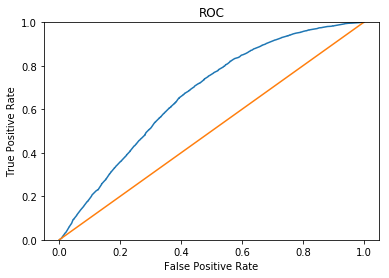

In [68]:
# Plot ROC Curve
y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
#plot
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [69]:
#Get other metrics
print('Recall Score:',metrics.recall_score(y_test,y_pred_test))
print('Precision:', metrics.precision_score(y_test,y_pred_test))

Recall Score: 0.8722829424045192
Precision: 0.7517993226079593


In [70]:
print("The percentage of 'dmsold' marked '1' in the dataset is:",data2.dmsold.mean())

The percentage of 'dmsold' marked '1' in the dataset is: 0.6854646746011649


Conclusions and Comments:

1. Since the actual percentage of samples labeled '1' is 68.5%, the model built under default parameter value is a meanless model based on the accuracy value 66.8% which is less than 68.5%.
2. After model tuning, we got a better model with accuary around 71% and AUC(area under the ROC curve) near 62%. The model is still a poor model based on the metrics AUC and accuracy, but if we focus on the recall which is around 87% and the precision which is 75%, we can say the model is fair.
2. The model built on the tuned parameters is not overfitting given that OOB and test results are very close. 

The results is based on the default cutoff value 0.5. However, 0.5 is not always the best cutoff point. It really depends on what we are optimizing for(accuracy? recall? precision?).

We can choose cutoff point based on the KS statistics which is the maximum distance between true positive rate and false positive rate.

In [71]:
# we will focus on class errors, defined as class0_error = fpr and class1_error = 1 - tpr
error_cutoff=pd.DataFrame({'cutoff':pd.Series(thresholds),
                               'class0_error':pd.Series(fpr),
                               'class1_error': 1 - pd.Series(tpr)
                                })
error_cutoff['optimal_value'] = 1 - error_cutoff['class1_error'] - error_cutoff['class0_error']
print(error_cutoff.sort_values('optimal_value', ascending=False).head(1))

     cutoff  class0_error  class1_error  optimal_value
791   0.605      0.489741      0.247083       0.263176


In [72]:
# Set the cut-off=0.605
from sklearn.preprocessing import binarize
y_pred_prob=rf.predict_proba(X_test)[:,1]
y_pred_class=binarize([y_pred_prob],0.605)[0]
print('Accuracy is:', metrics.accuracy_score(y_test,y_pred_class))
print('AUC is:', metrics.roc_auc_score(y_test,y_pred_class) )
print('Recall Score:',metrics.recall_score(y_test,y_pred_class))
print('Precision:', metrics.precision_score(y_test,y_pred_class))
#y_pred_prob[y_pred_prob>=0.605]=1
#y_pred_prob[y_pred_prob<0.605]=0

Accuracy is: 0.6762893559550941
AUC is: 0.6311824490366449
Recall Score: 0.7515657620041754
Precision: 0.7715582450832073


In [73]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1892, 1812],
       [2023, 6120]], dtype=int64)

The hightest ks score 0.263 is at cutoff point 0.605 with around 75% true positive rate and 49% false positive rate. We can find the corresponding point on the ROC curve. The AUC value under the threshold 0.603 is around 63%, which is a little bit better than that under threshold 0.5.

## 7.3 Check feature importance 

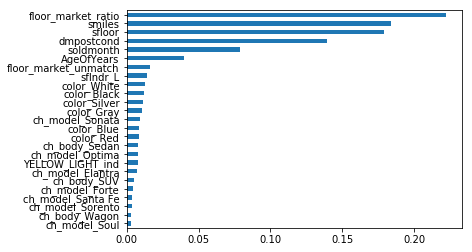

In [74]:
# Check the model feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

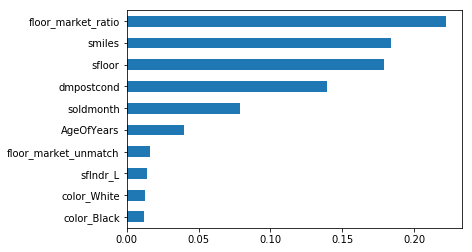

In [76]:
# Check the top 10 feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values()[15:].plot(kind='barh')
plt.show()

The most important feature in the model is 'floor_market_ratio', which means wether the floor price respect with market price really influence the auto sell. Floor price and floor-market price unmatch indicator are also within the top 10 important features, which further explain that the reasonable floor price setting is very important for the auto auction.

Except the floor price setting, the other factors like miles, vehicle condition,sold month, age and the color, also impact the probablity of auto sell.

Let’s check the partial dependence plots for the top 10 features:

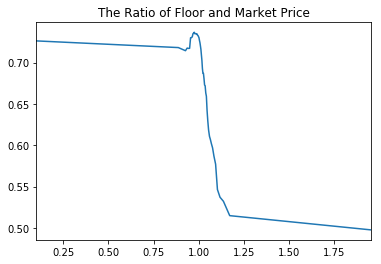

In [77]:
from pdpbox import pdp, info_plots
  
#Partial plot of 'floor_market_ratio'
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='floor_market_ratio', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='The Ratio of Floor and Market Price')
plt.show()

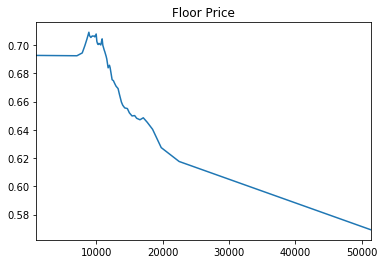

In [78]:
#Partial plot of the floor price
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='sfloor', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Floor Price')
plt.show()

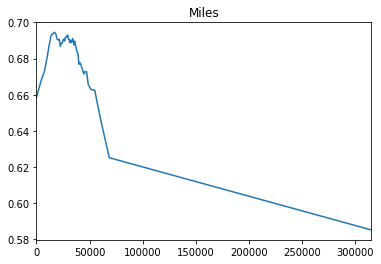

In [79]:
#Partial plot of miles
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='smiles', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Miles')
plt.show()

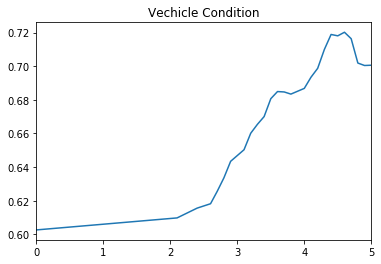

In [80]:
#Partial plot of Vehicle Condition
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='dmpostcond', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Vehicle Condition')
plt.show()

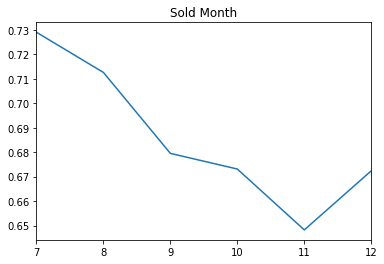

In [81]:
#Partial plot of Sold Month
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='soldmonth', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Sold Month')
plt.show()

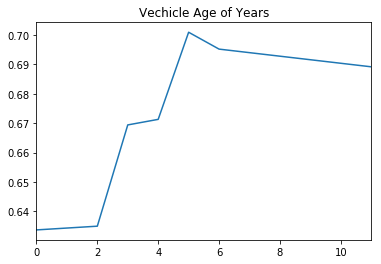

In [82]:
#Partial plot of Vehicle Age of years
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='AgeOfYears', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Vehicle Age of Years')
plt.show()

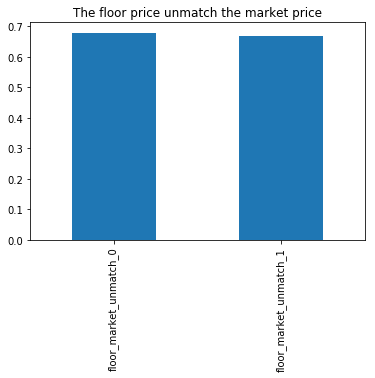

In [83]:
from pdpbox import pdp, info_plots
  
#Partial plot of  'floor_market_unmatch'
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature='floor_market_unmatch', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='The floor price unmatch the market price')
plt.show()

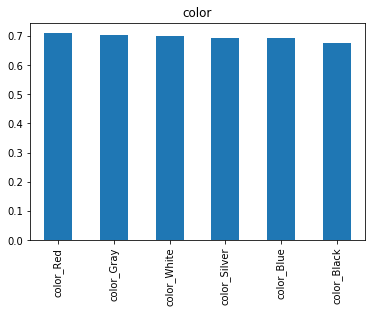

In [84]:
from pdpbox import pdp, info_plots
  
#Partial plot of color
pdp_iso = pdp.pdp_isolate(model=rf,       
                          dataset=X_train,
                          model_features=list(X_train), 
                          feature=['color_White','color_Black','color_Silver', 'color_Gray', 
                                   'color_Blue', 'color_Red'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='color')
plt.show()

From the Partial dependent plots we can find the details of how the features inflence the sell, such as from the plot of 'floor_market_ratio', we can find the ratio over 1 which means that the floor price higher than market price will dramatically reduce the probablity of auto sell.

# Conclusion and Next Steps

1. The model shows that the fair Floor Price setting is one of the critical factors for increase the auto sell chance. The dealer should set the auto floor price under auto market price. In addition, Floor Price, Vehicle condition and age, miles are also influence the sell. The dealer can increase the auto sell chance by reconditioning the auto.

2. Most of the important features in the model are not 'actionable' and the dealer can't contral them. I will do more research on the features and modeling methods to see if I can find more 'actionable' features and build a better model in the near future.